<h1>Week-1 Project</h1>

In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [70]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [9]:
df=pd.read_csv("WaterQualityPedictionDataset.csv",sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [10]:
#rows and cols
df.shape

(2861, 11)

In [11]:
#Statistixs of the data
df.describe()

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [13]:
#missing values
df.isnull()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2856,False,False,False,False,False,False,False,False,False,False,False
2857,False,False,False,False,False,False,False,False,False,False,False
2858,False,False,False,False,False,False,False,False,False,False,False
2859,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [15]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [16]:
df.tail()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49
2860,22,10.02.2021,0.000,1.78,0.0,14.30,6.30,0.033,134.40,0.582,66.31


In [17]:
#date is an object-data formate
df['date']=pd.to_datetime(df['date'],format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [19]:
df=df.sort_values(by=['id','date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [20]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [21]:
df.columns


Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [94]:
Index=['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month']

In [22]:
pollutants=['O2','NO3','NO2','SO4','PO4','CL']


<h1>Week-2 Project</h1>

In [ ]:
#Align with training feature columns  

In [24]:
#Drop the missing values
df=df.dropna(subset=pollutants)
df.head()


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [25]:
df.isnull().sum()

id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

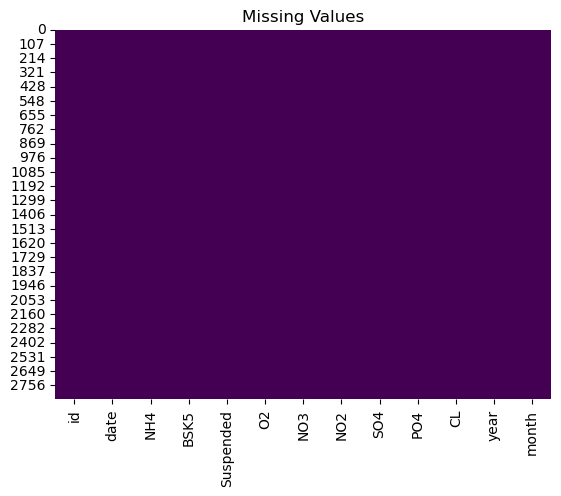

In [99]:
#Visualize misssing data
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Values")
plt.show()

In [108]:
#Fill misssing values
df['pH']=np.round(np.random.uniform(6.5,8.5,size=len(df)),2)
df.head()


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,pH
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2,6.77
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5,7.49
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9,6.59
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12,7.62
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3,8.15


<h1>Distributiom of PH values<h1>

In [110]:
print(df['pH'].describe())

count    2780.000000
mean        7.500299
std         0.571847
min         6.500000
25%         7.000000
50%         7.500000
75%         7.990000
max         8.500000
Name: pH, dtype: float64


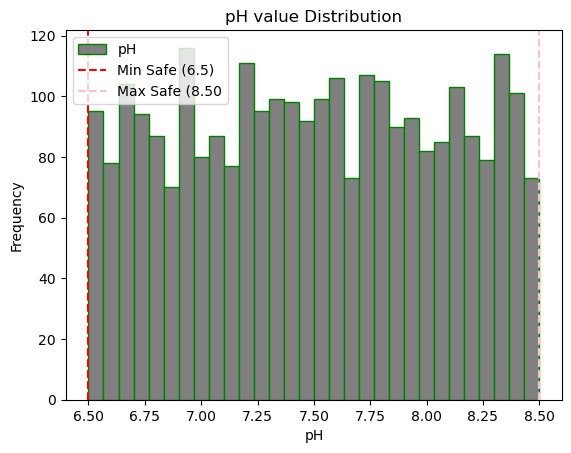

In [111]:
df['pH'].plot(kind='hist',bins=30,color='grey',edgecolor='green',title='pH value Distribution')
plt.axvline(6.5,color='red',linestyle='--',label='Min Safe (6.5)')
plt.axvline(8.5,color='pink',linestyle='--',label='Max Safe (8.50')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<h2>Feature and target selection<h2>

In [34]:
#Feature and target Selection
X=df[['id','year']]
y=df[pollutants]
X_encoded=pd.get_dummies(X,columns=['id'],drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42)
X_train.shape 

(2224, 22)

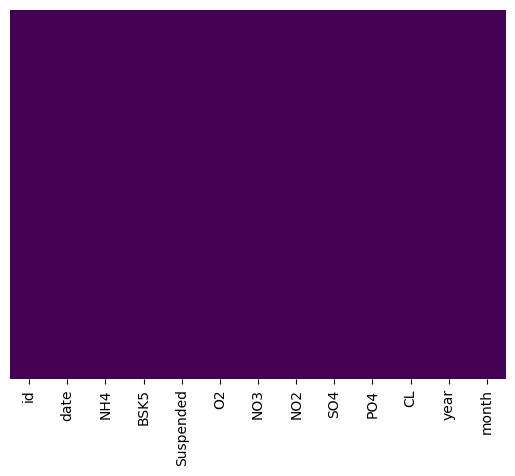

In [75]:
#Heatmap
null_df=df.isnull().sum().reset_index()
null_df.columns = ['Column','NULL_count']
null_df['%miss_value']=round(null_df['NULL_count']/len(df),2)*100
null_df
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

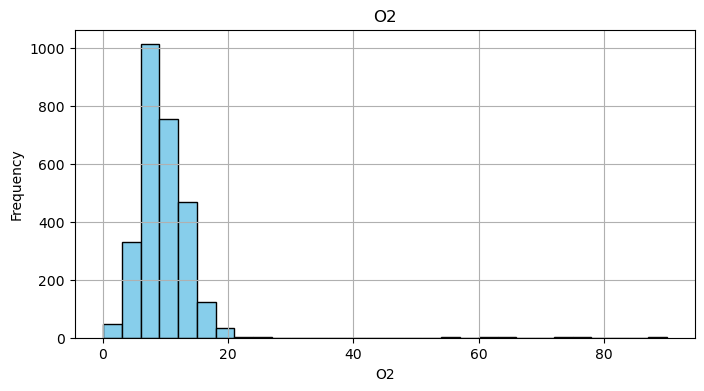

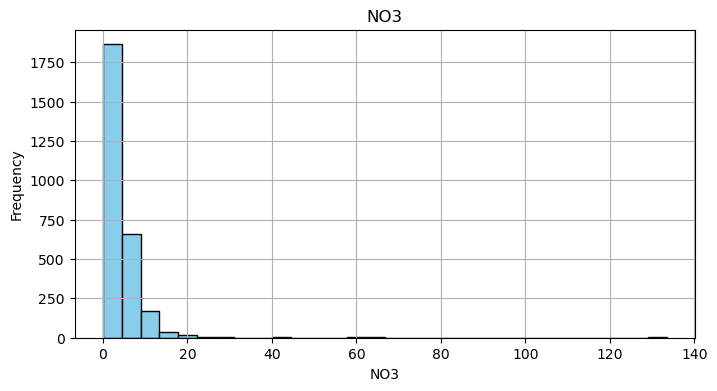

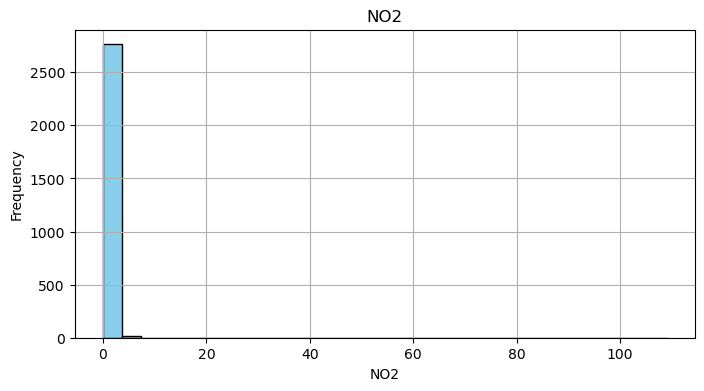

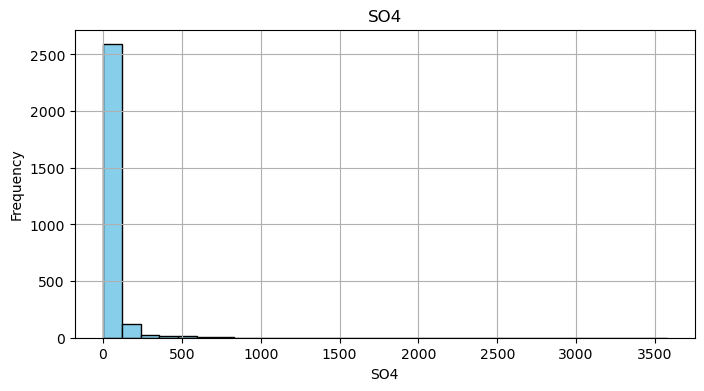

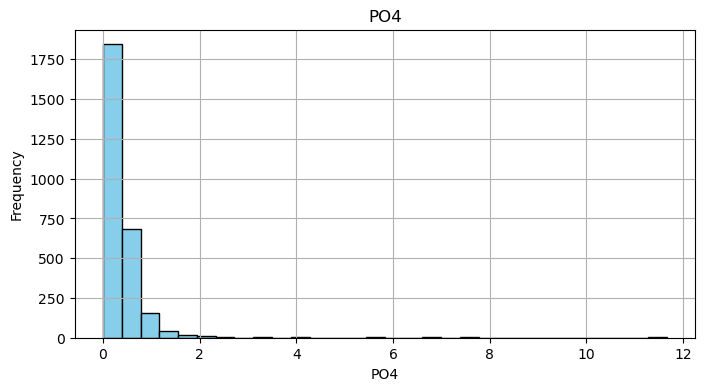

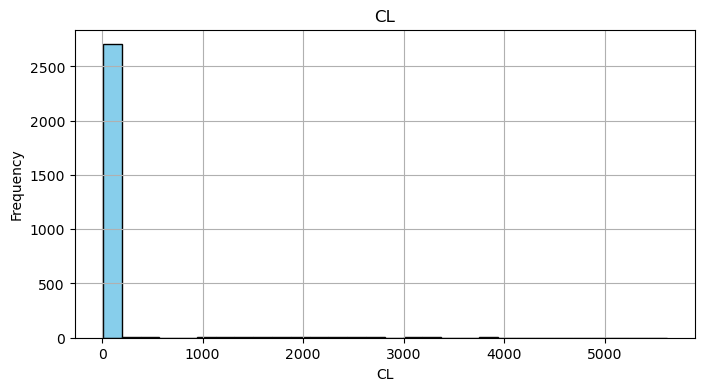

In [82]:
#Histogram
for p in pollutants:
    df[p].plot(kind='hist',bins=30,figsize=(8,4),color='skyblue',edgecolor='black',title=p)
    plt.xlabel(p)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

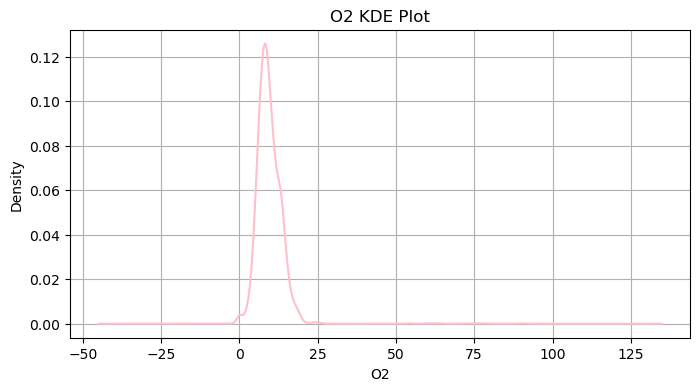

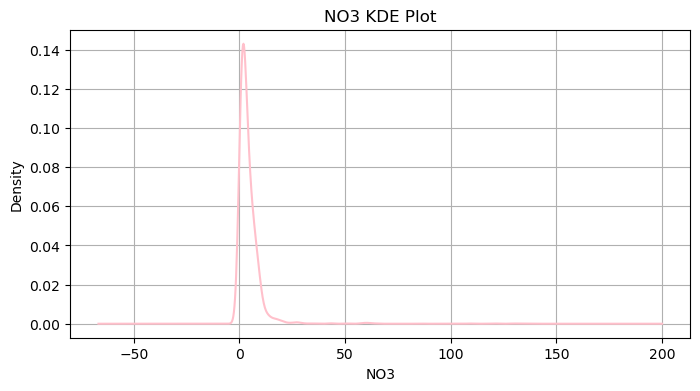

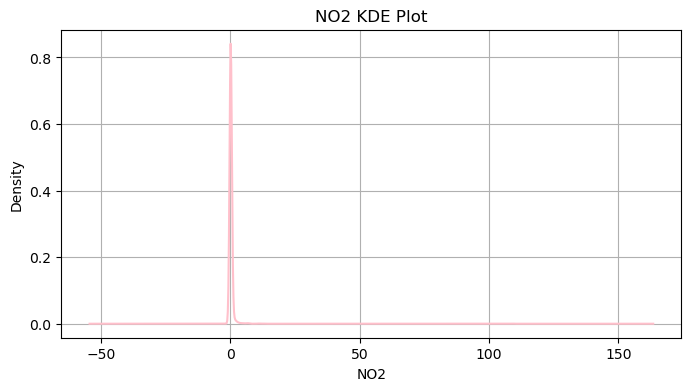

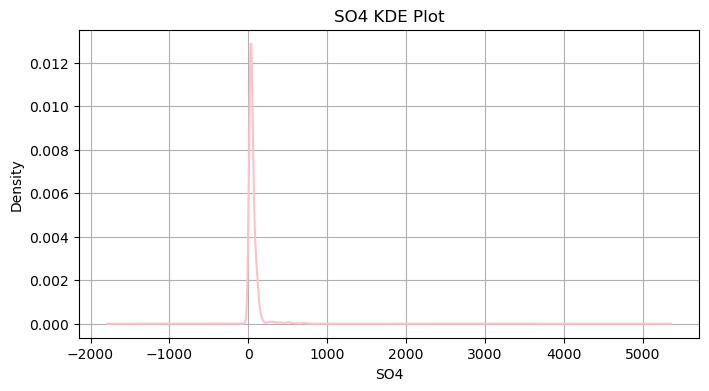

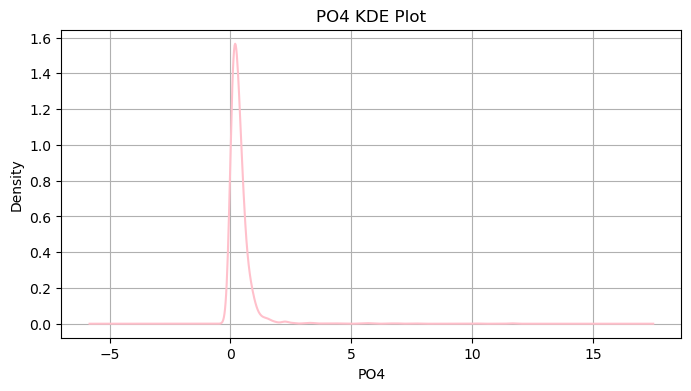

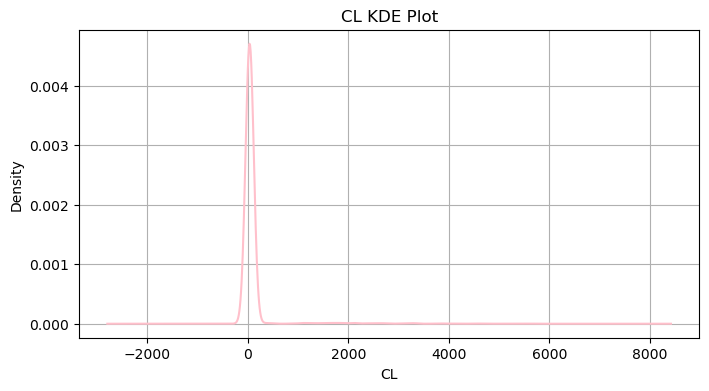

In [92]:
#KDE plot
for j in pollutants:
    df[j].plot(kind='kde',figsize=(8,4),color='pink',title=f'{j} KDE Plot')
    plt.xlabel(j)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

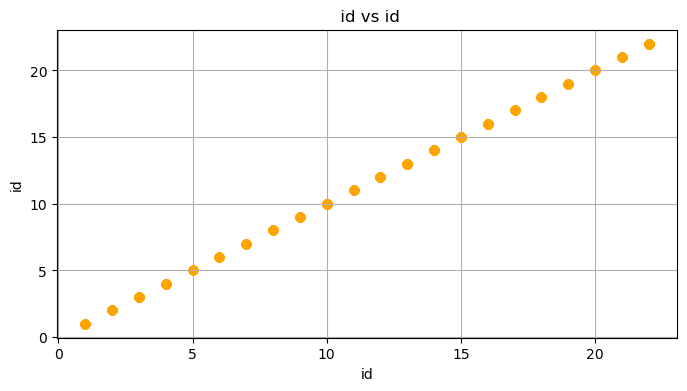

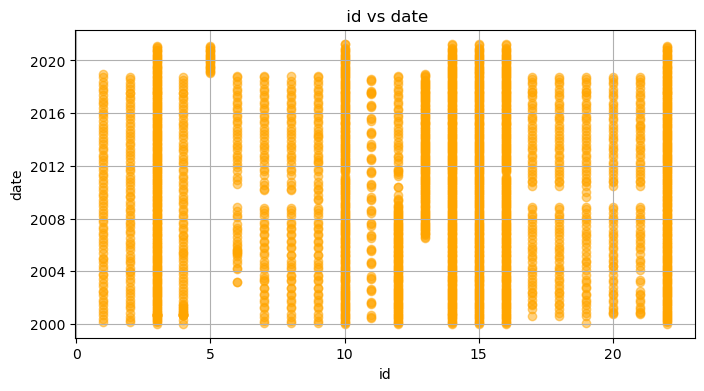

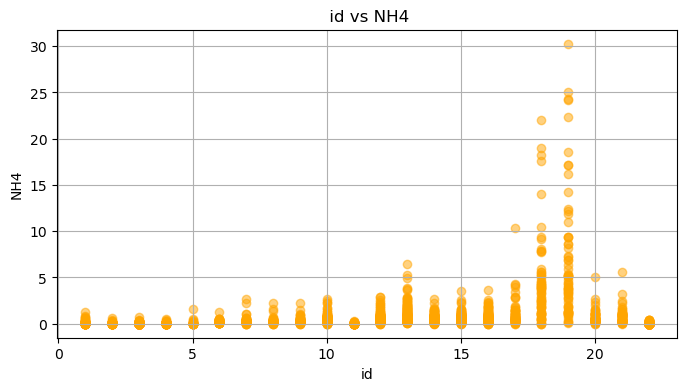

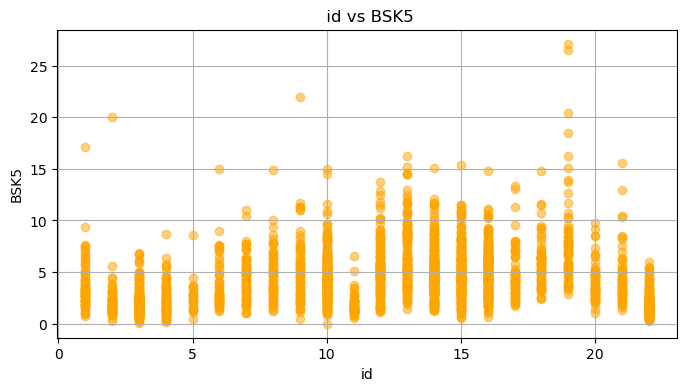

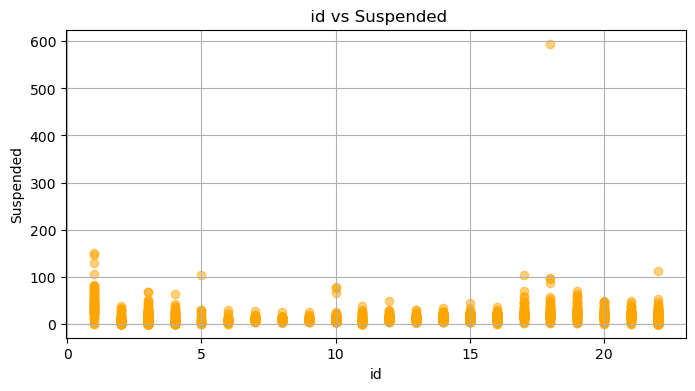

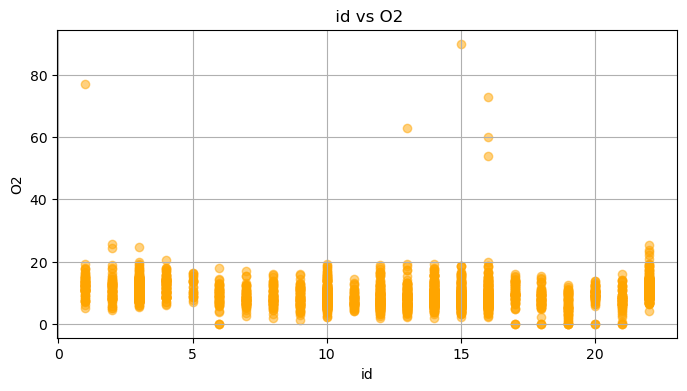

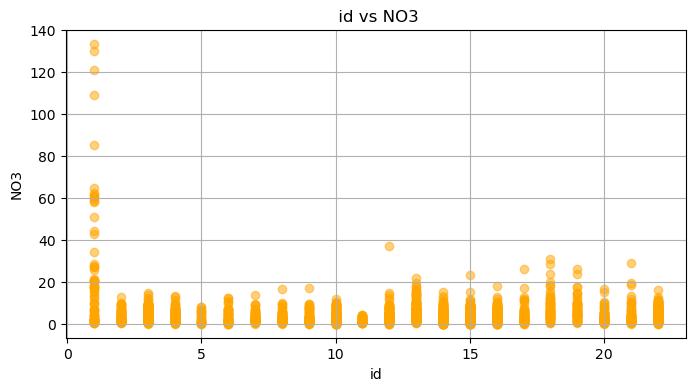

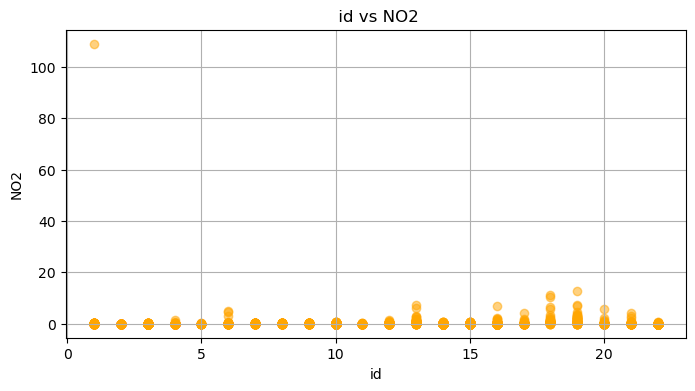

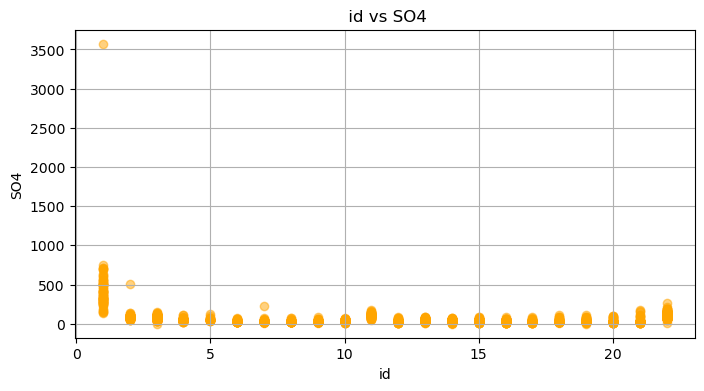

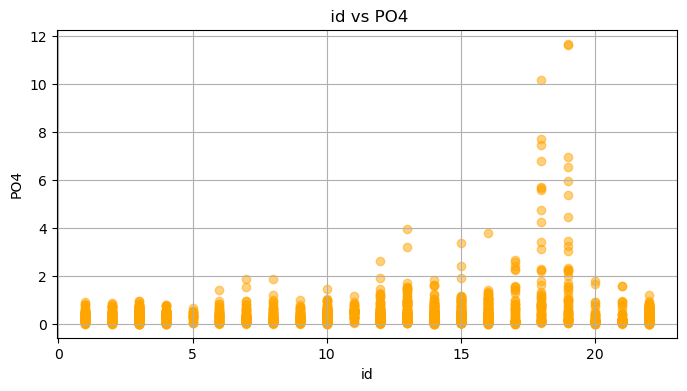

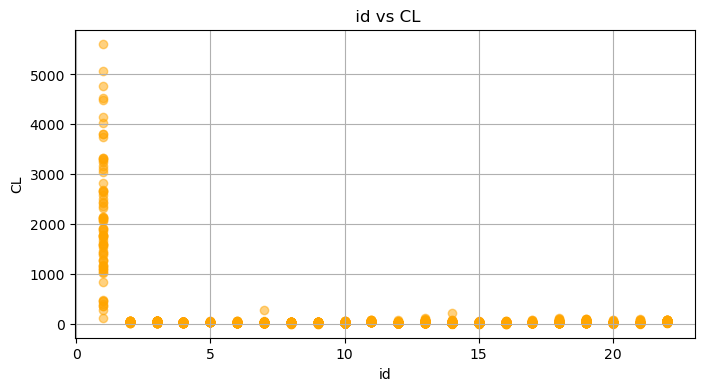

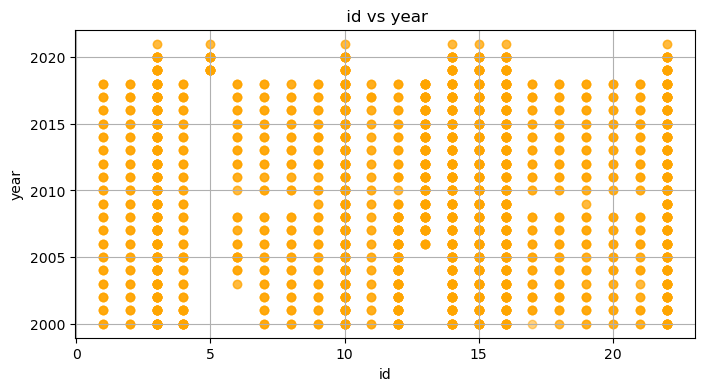

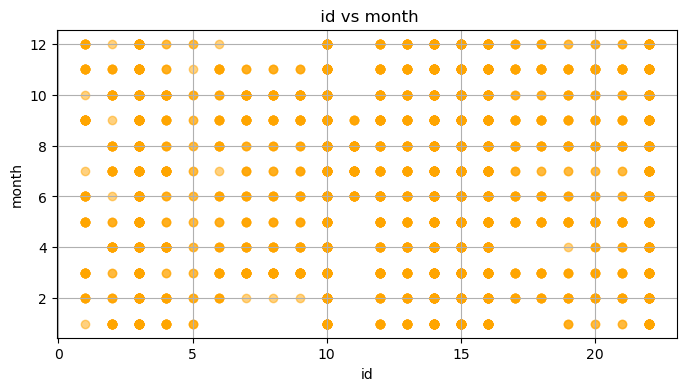

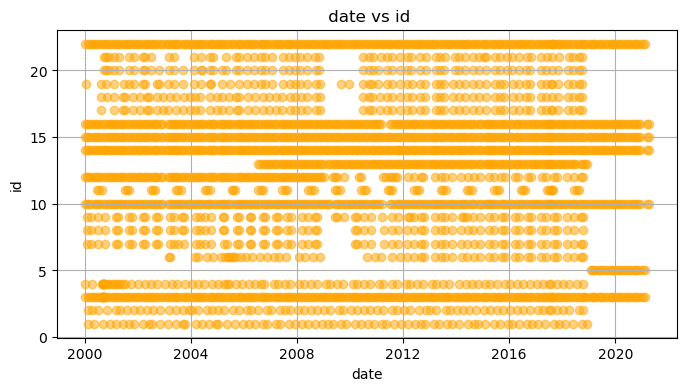

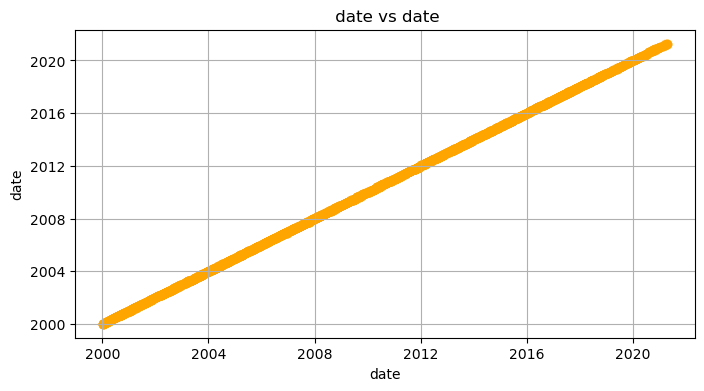

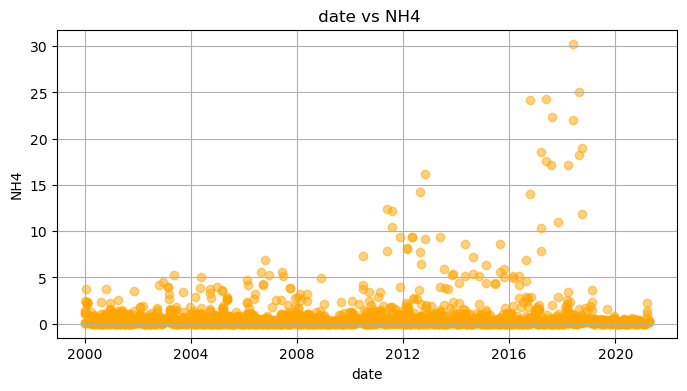

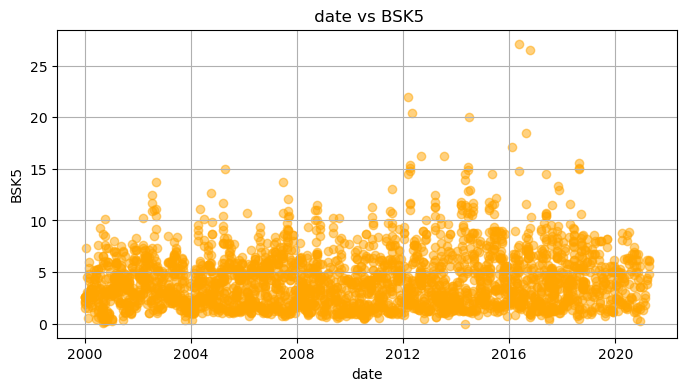

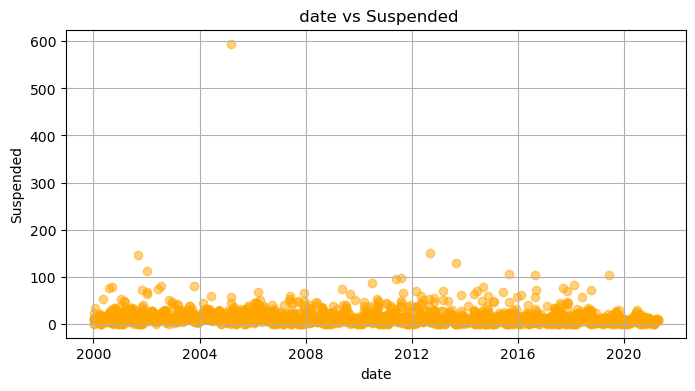

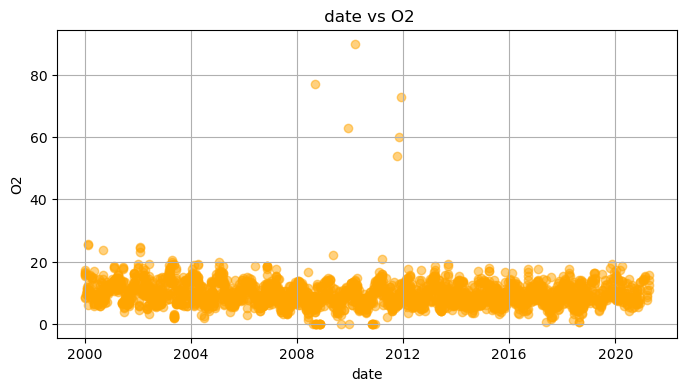

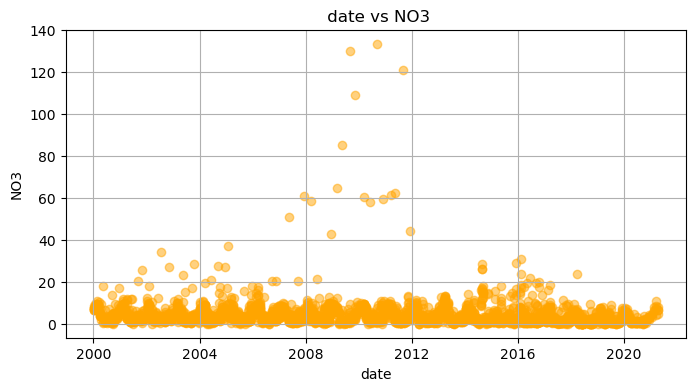

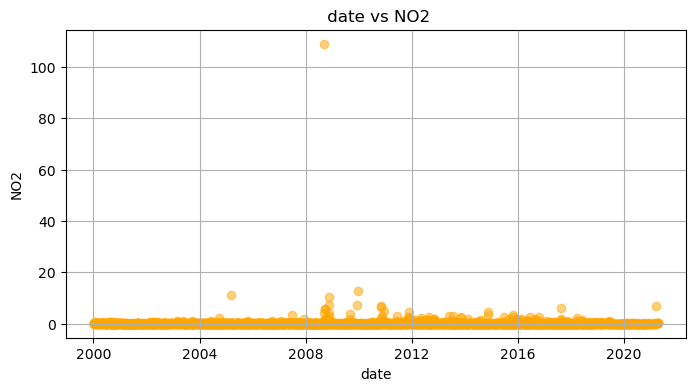

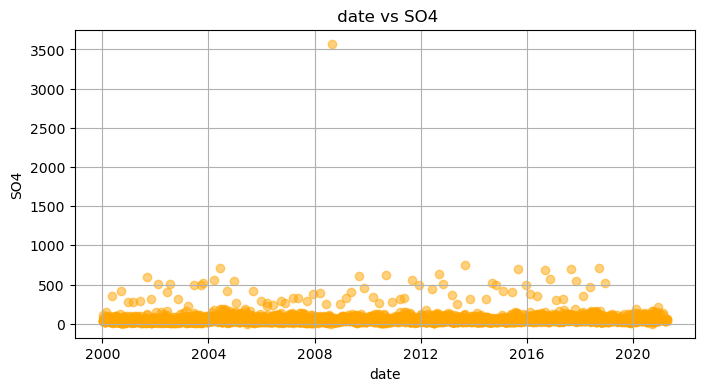

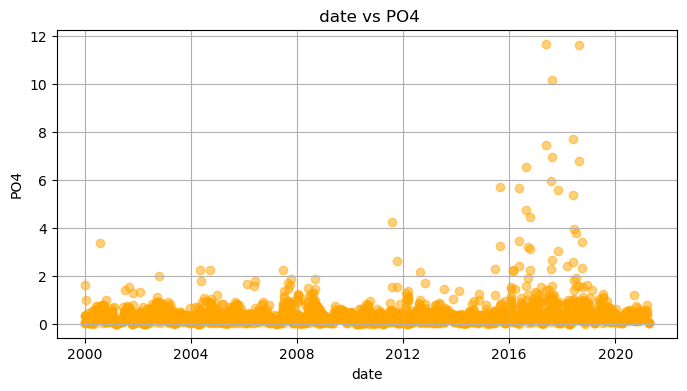

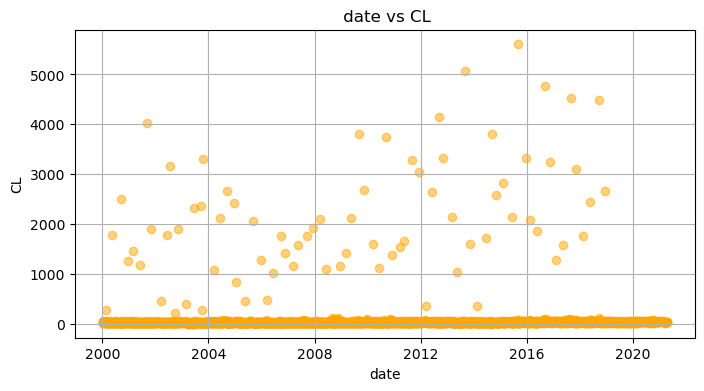

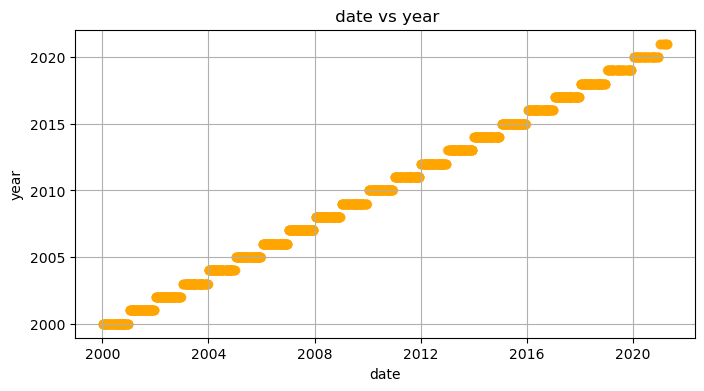

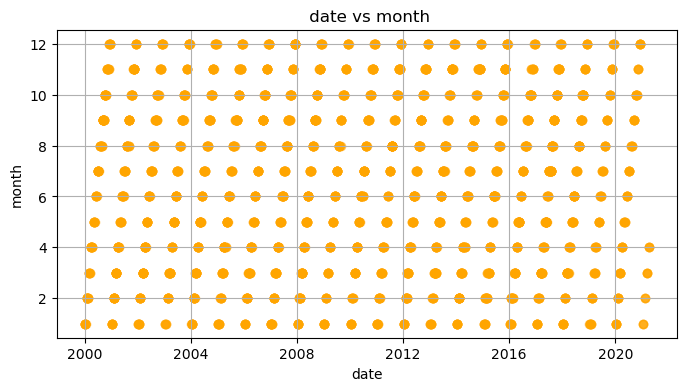

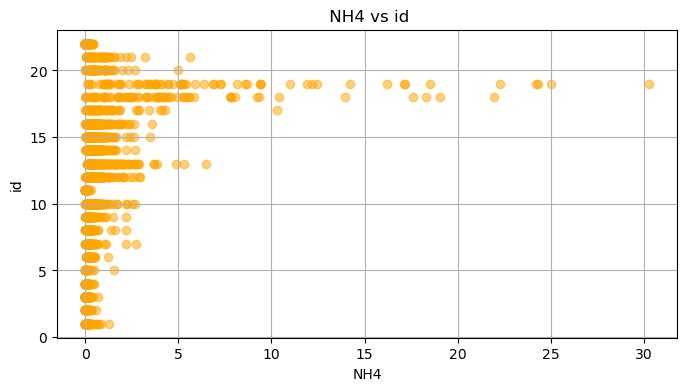

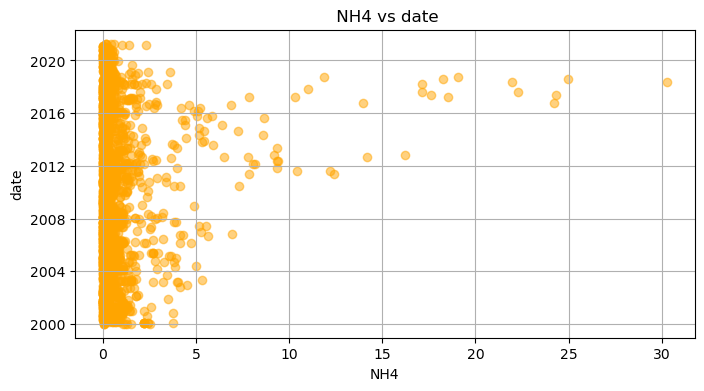

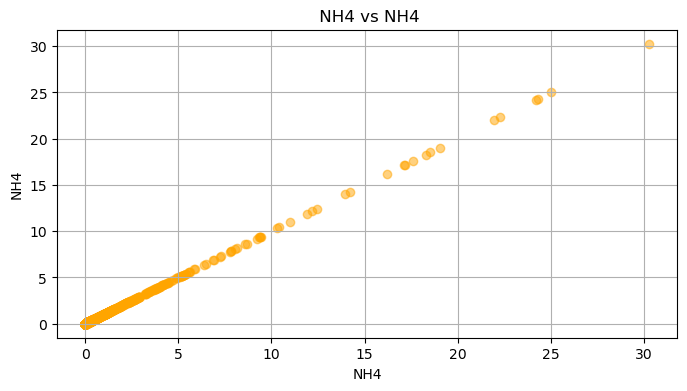

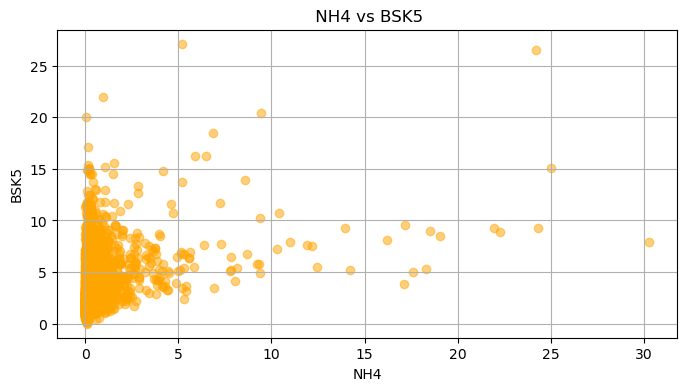

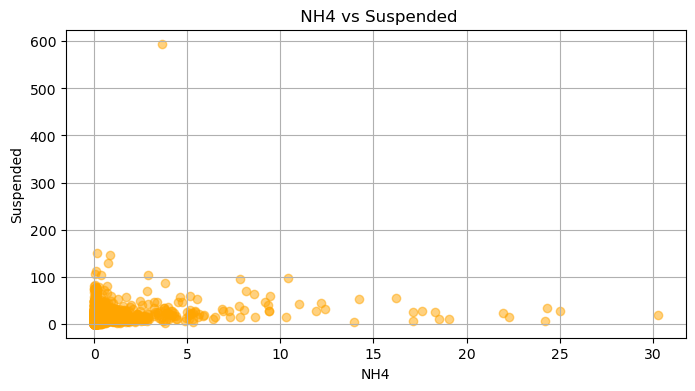

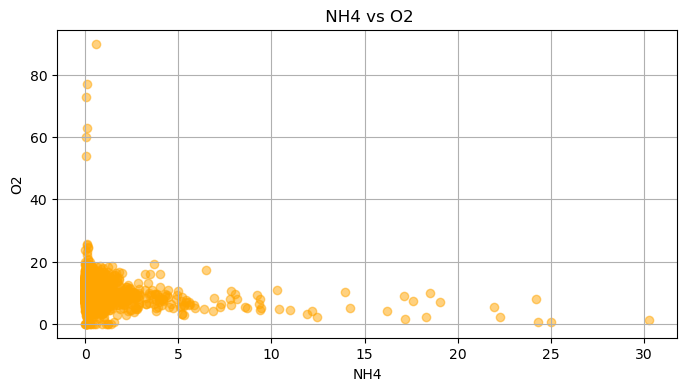

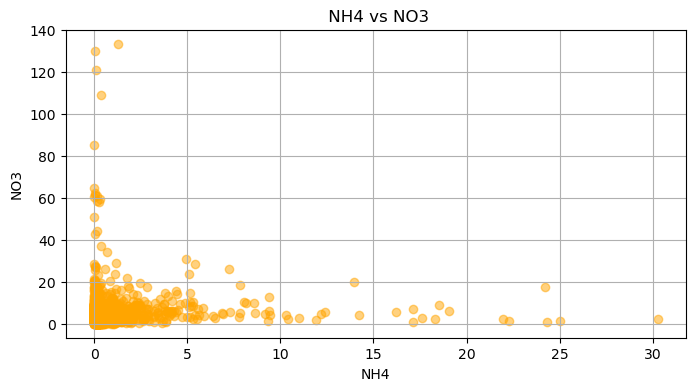

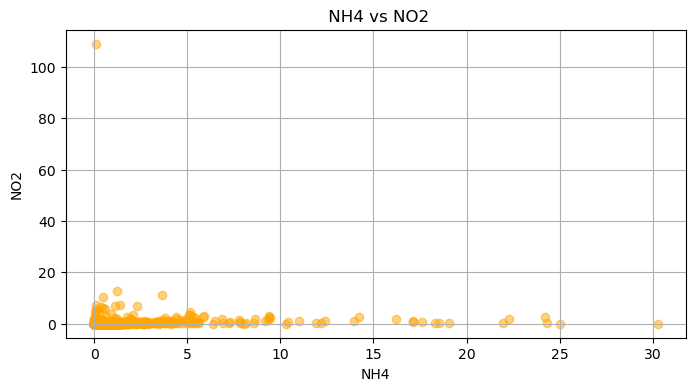

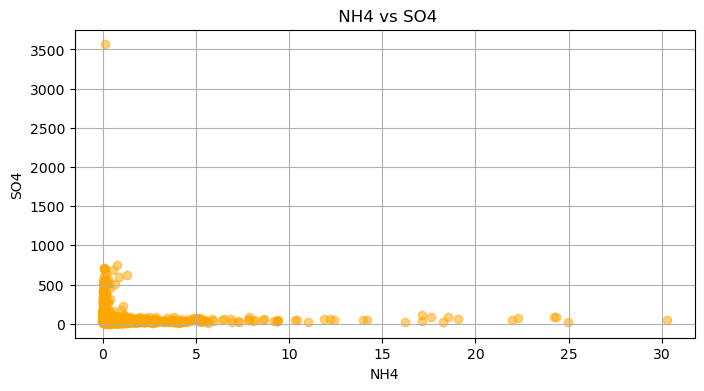

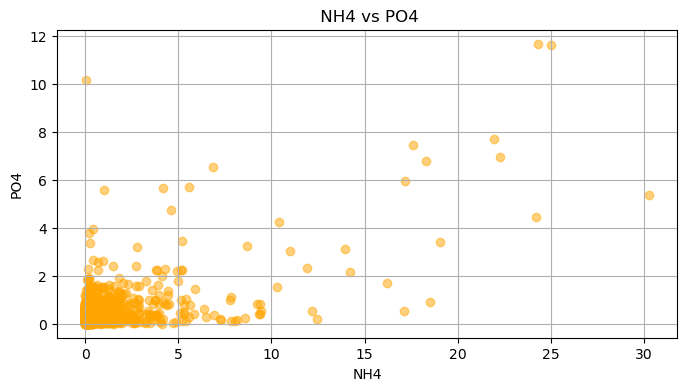

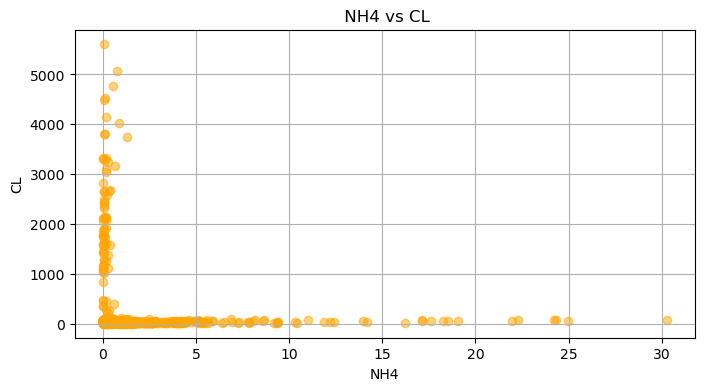

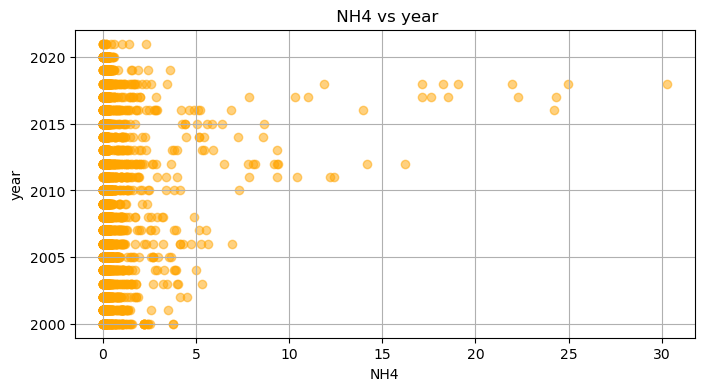

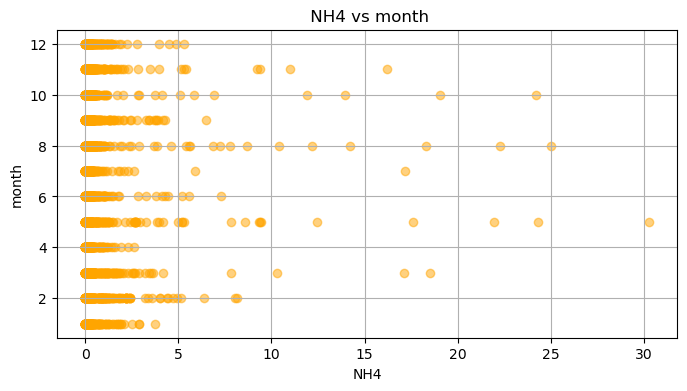

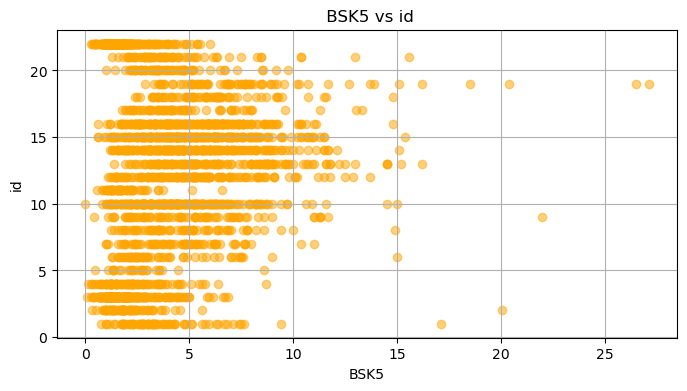

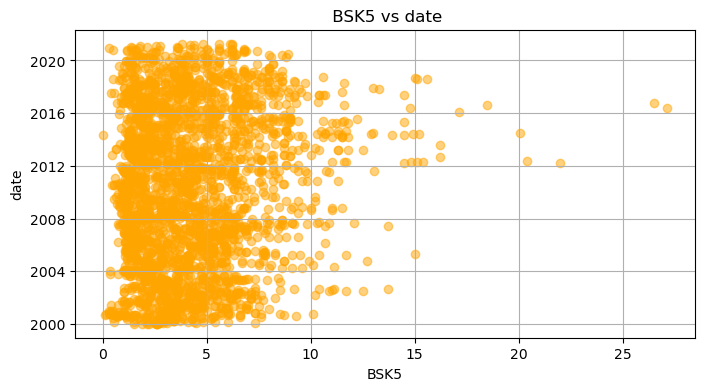

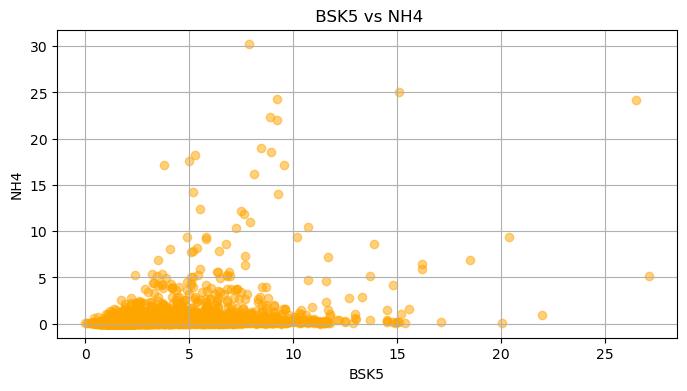

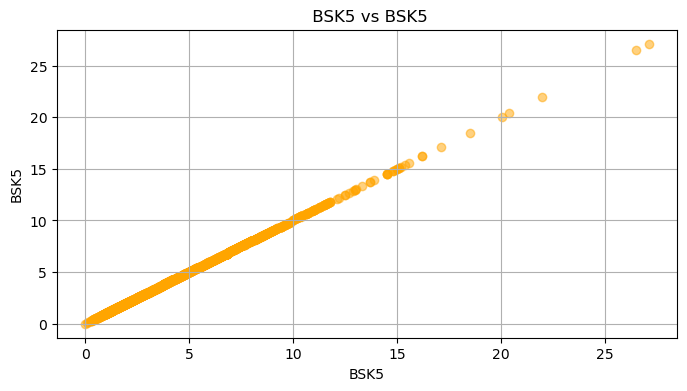

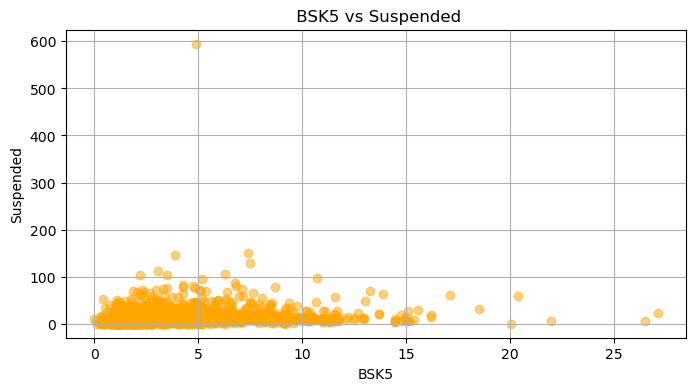

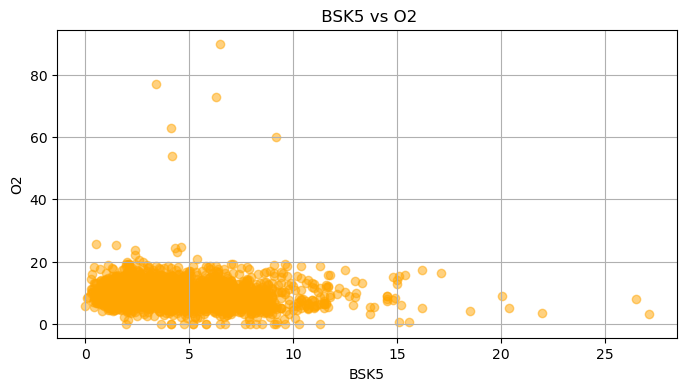

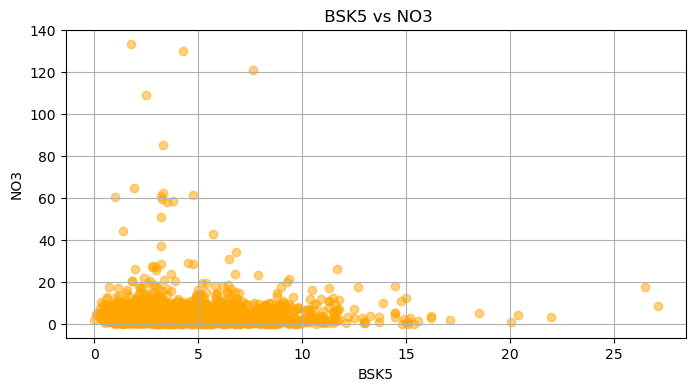

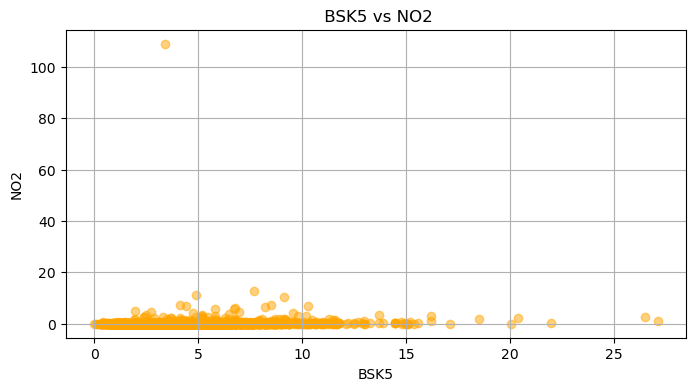

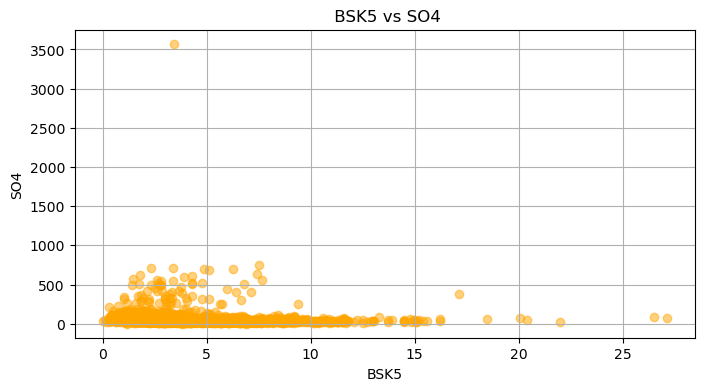

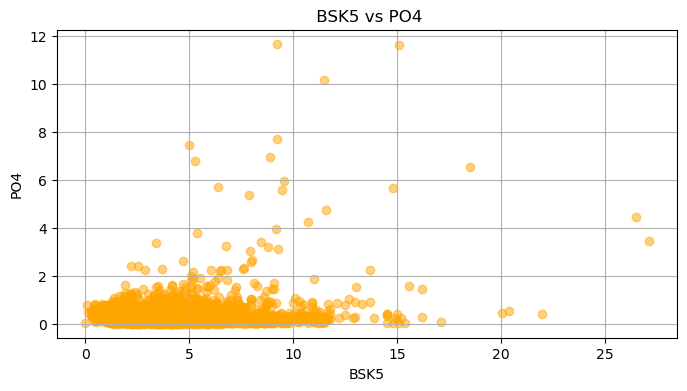

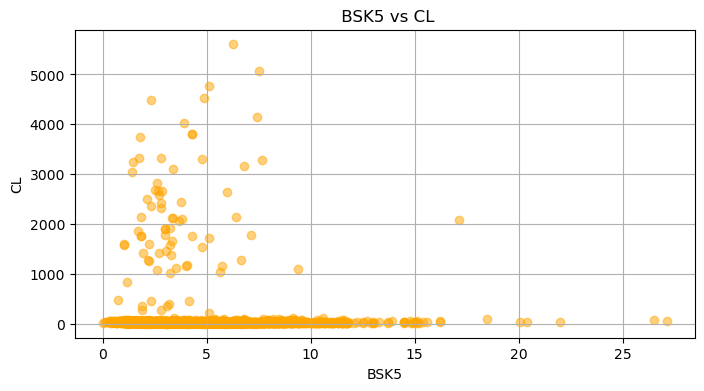

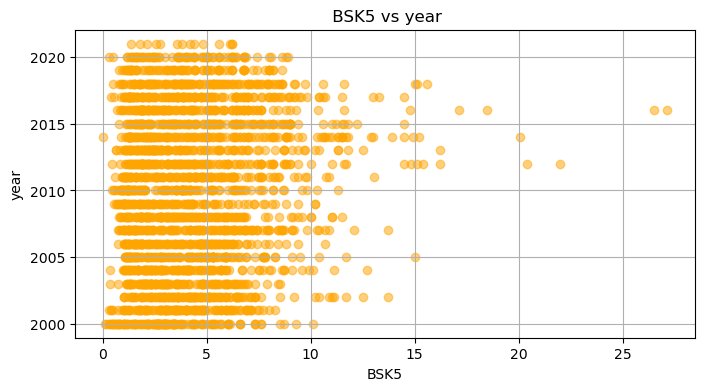

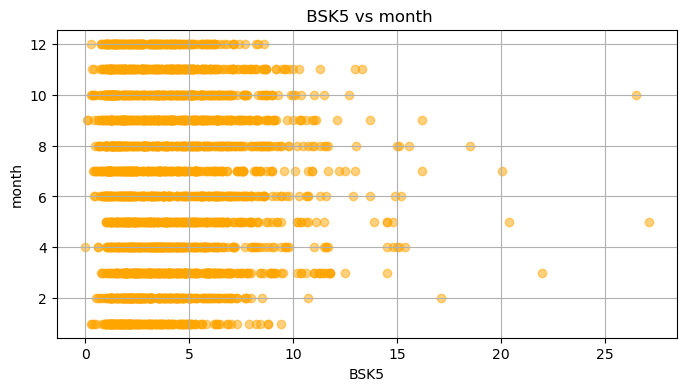

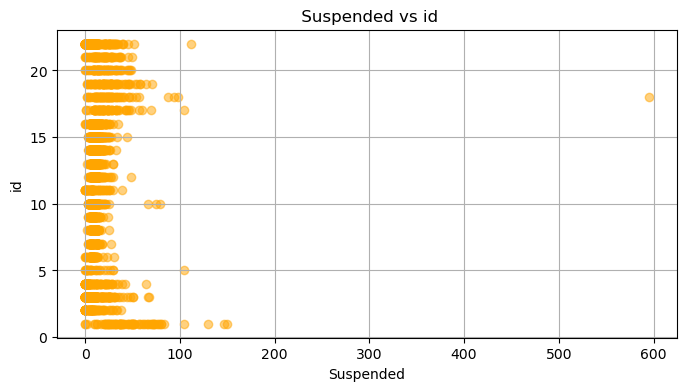

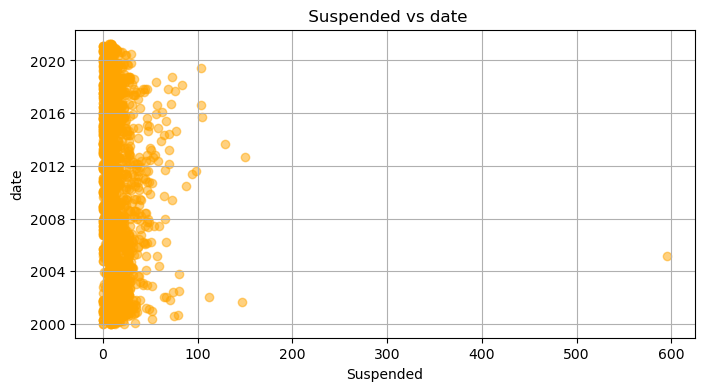

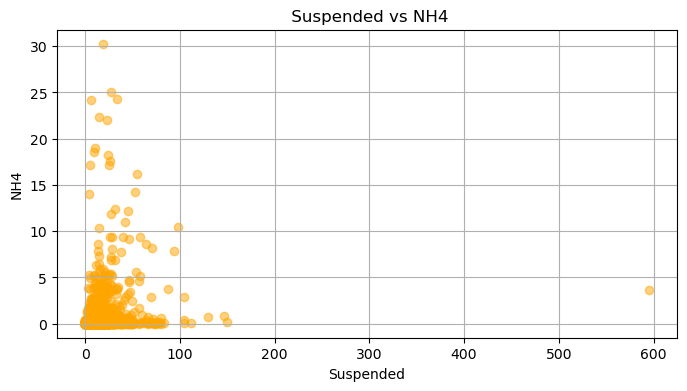

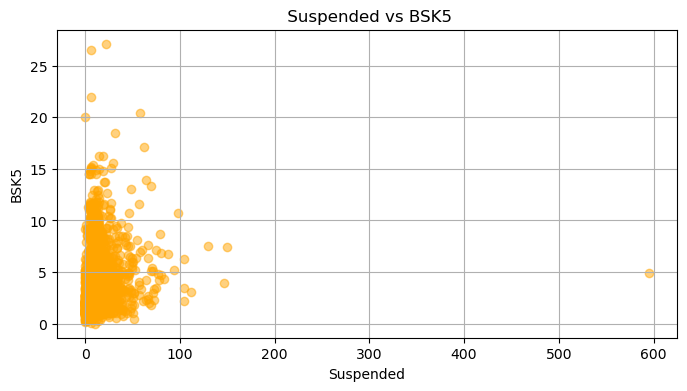

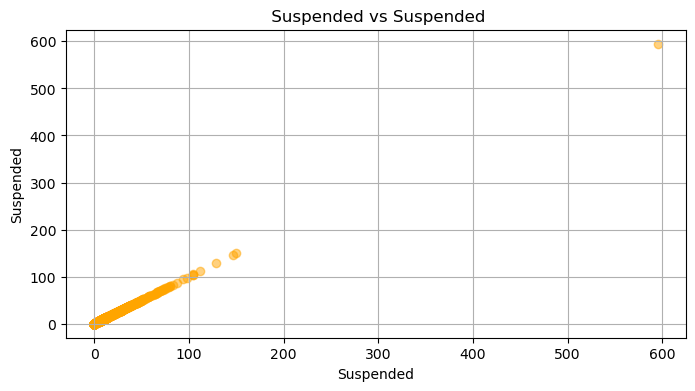

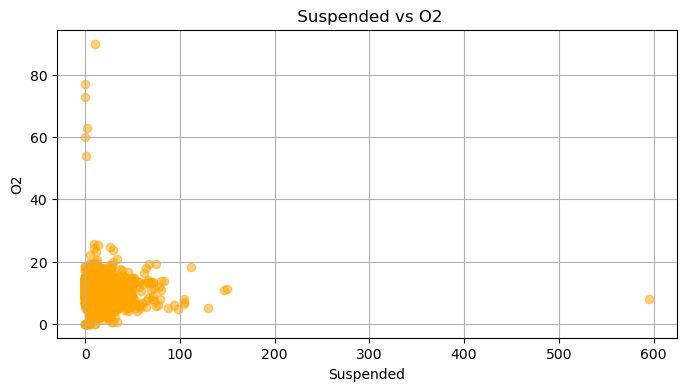

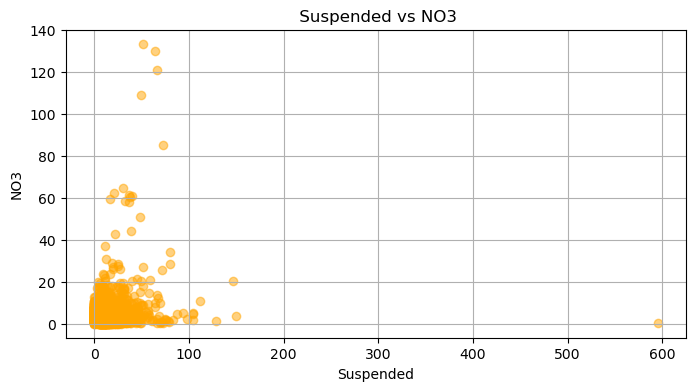

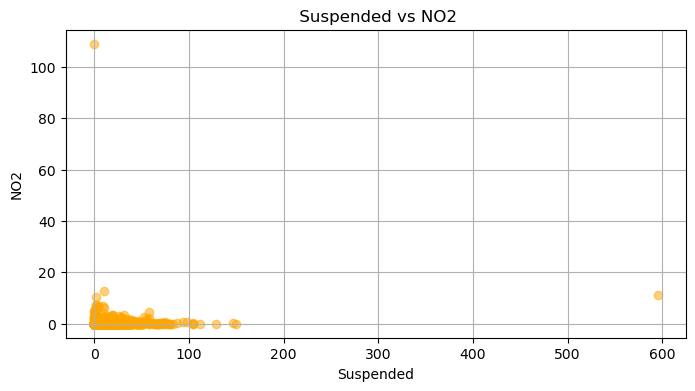

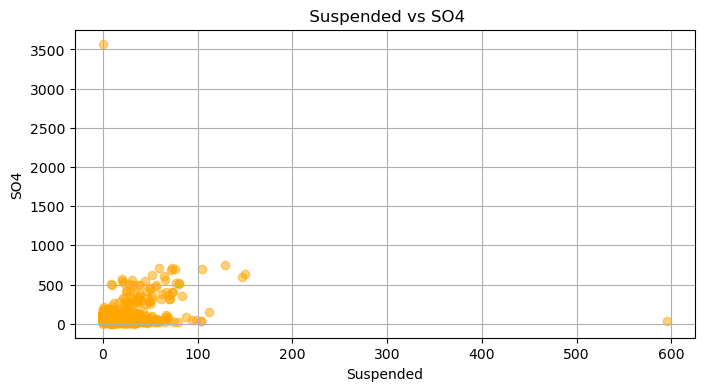

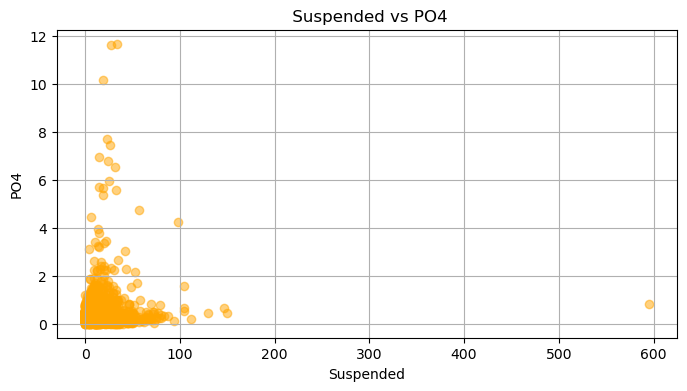

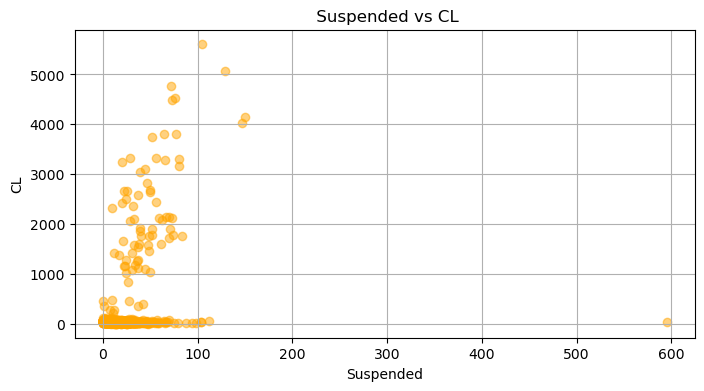

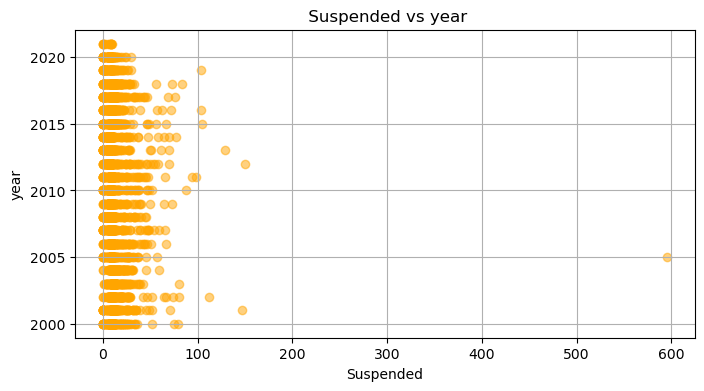

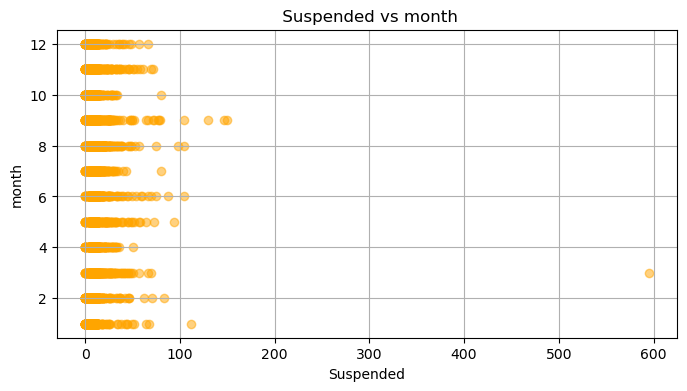

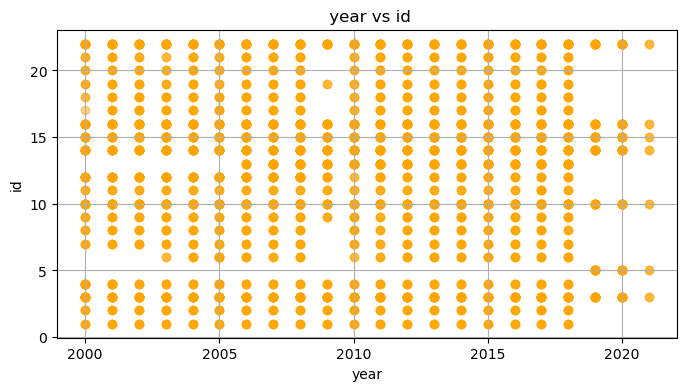

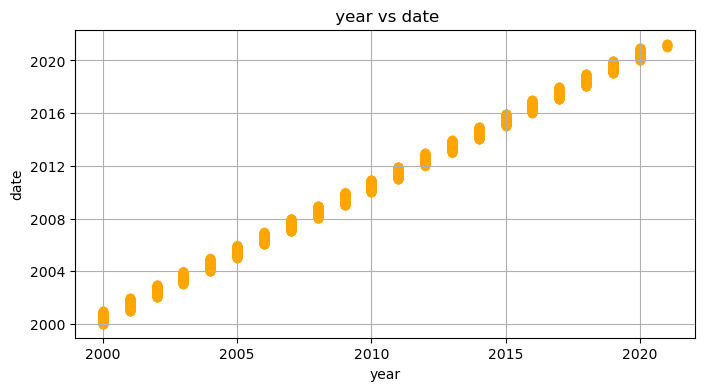

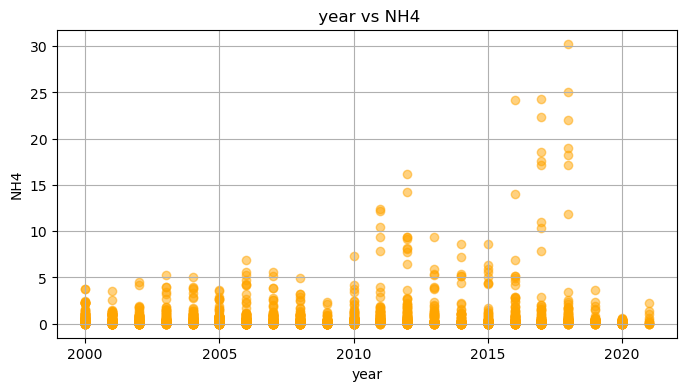

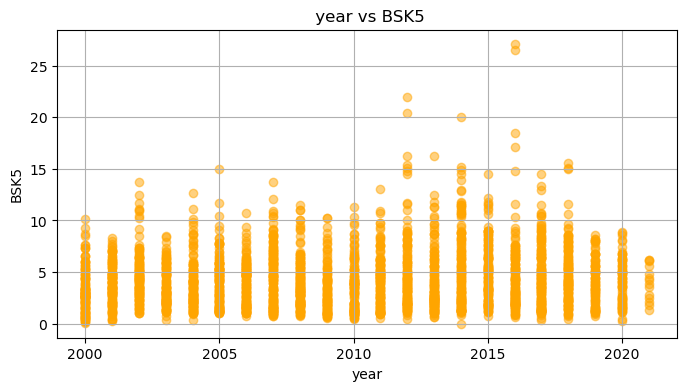

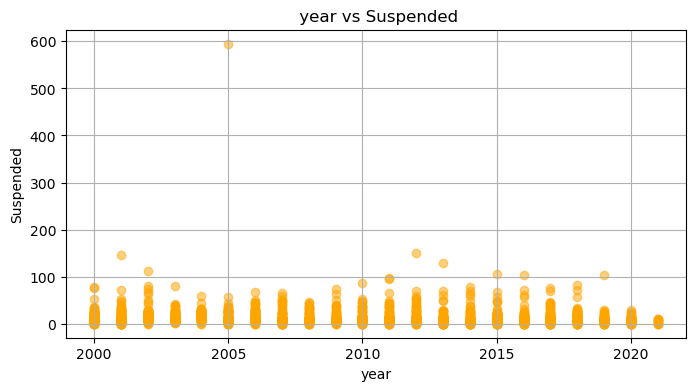

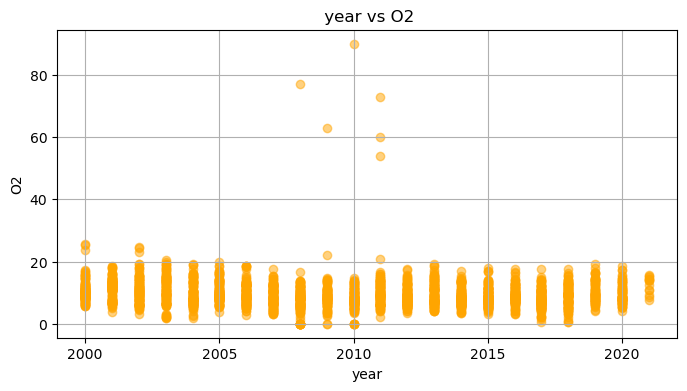

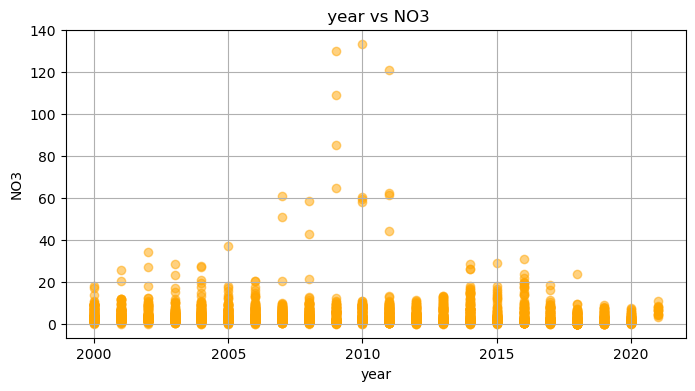

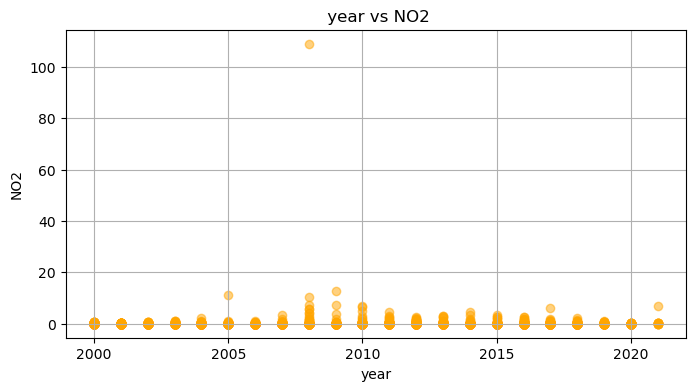

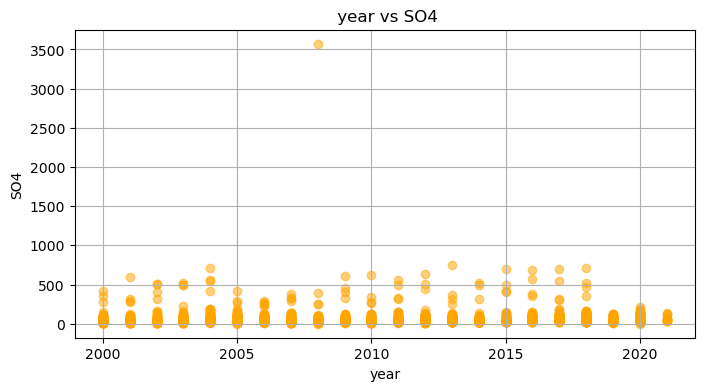

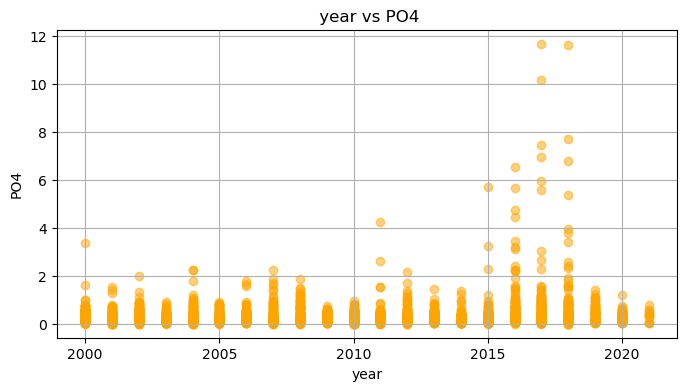

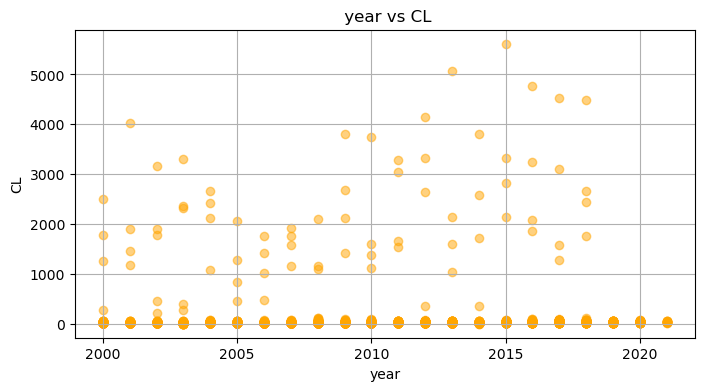

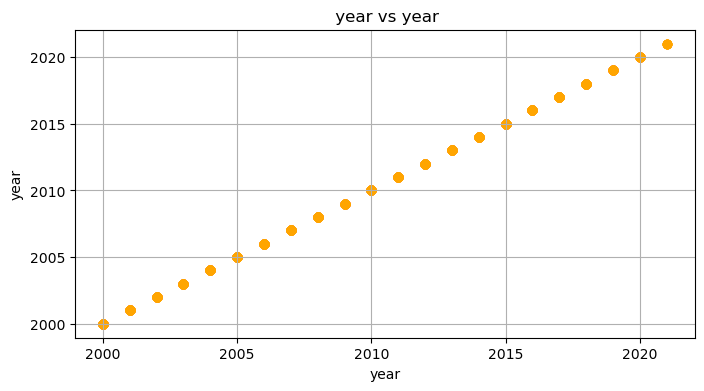

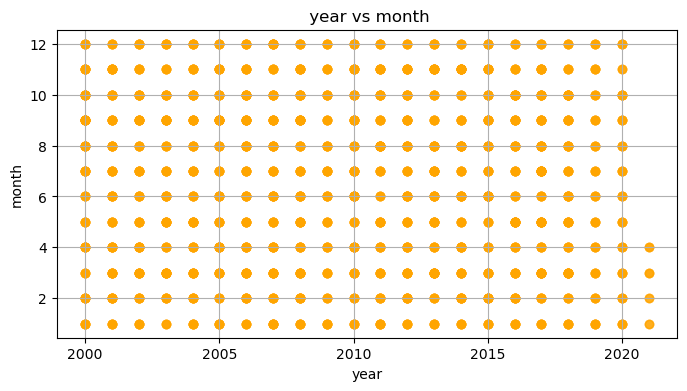

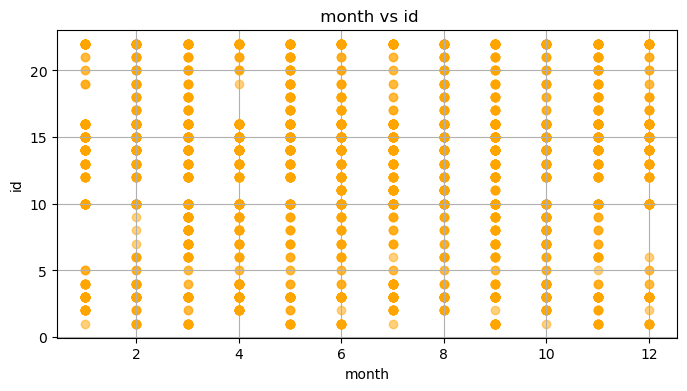

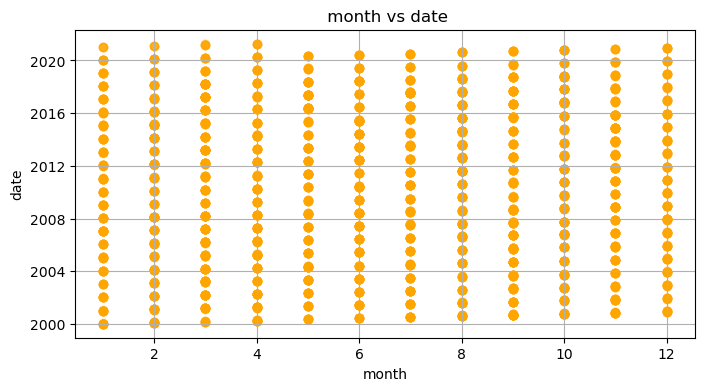

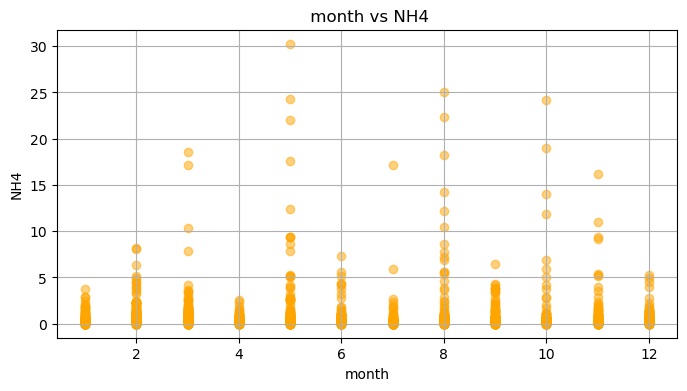

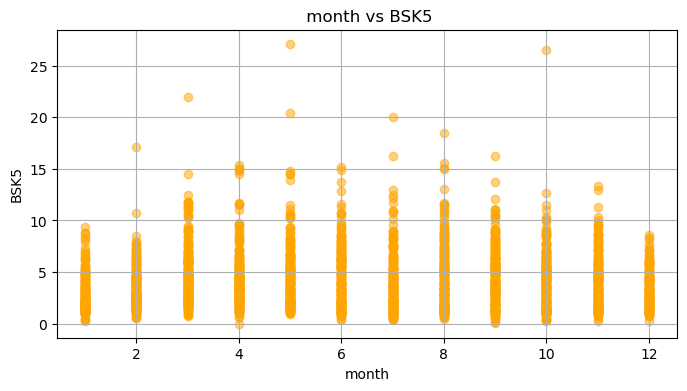

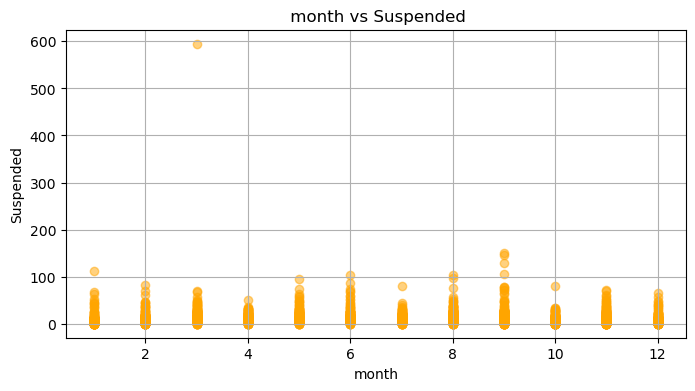

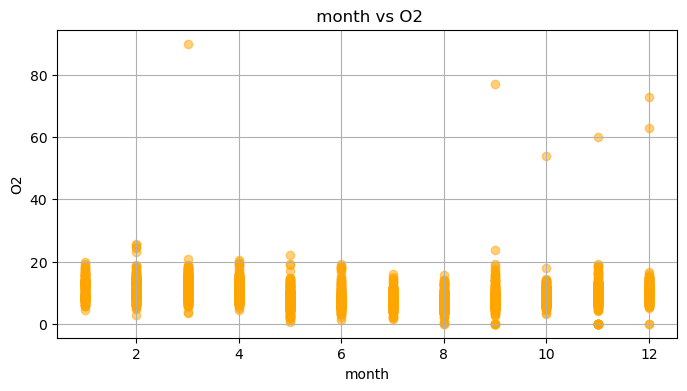

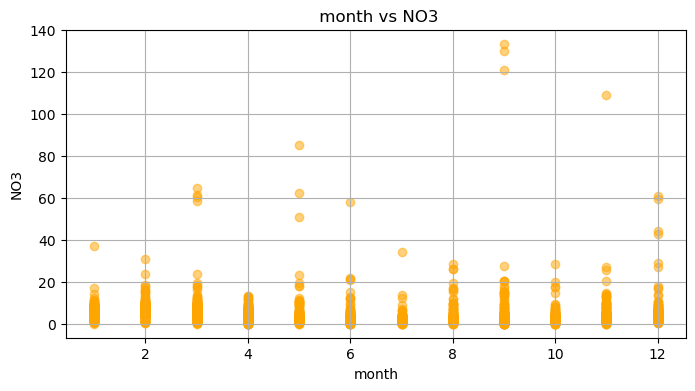

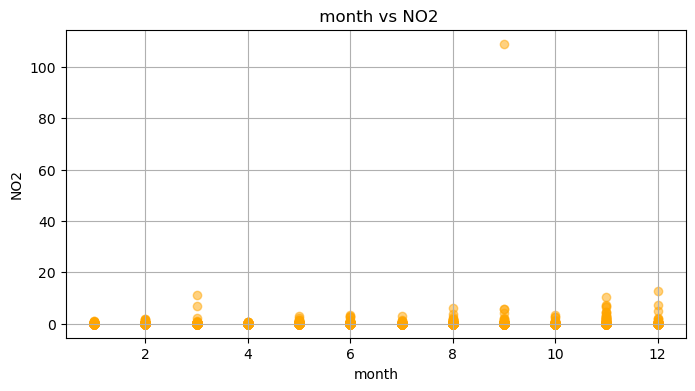

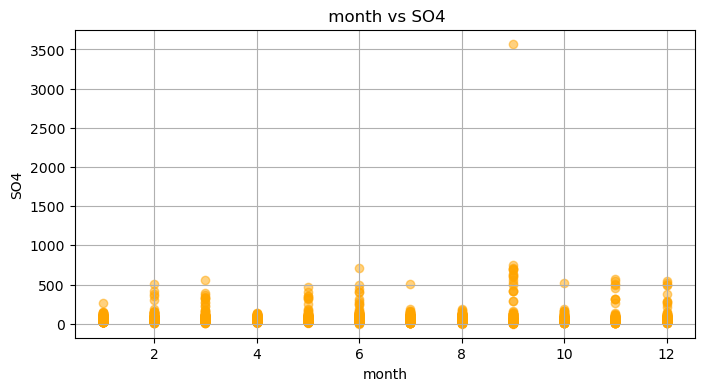

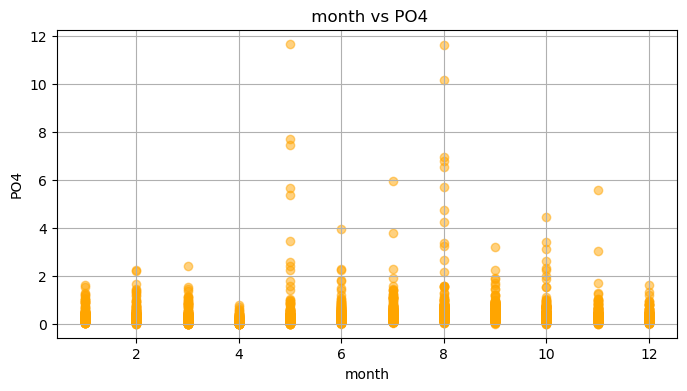

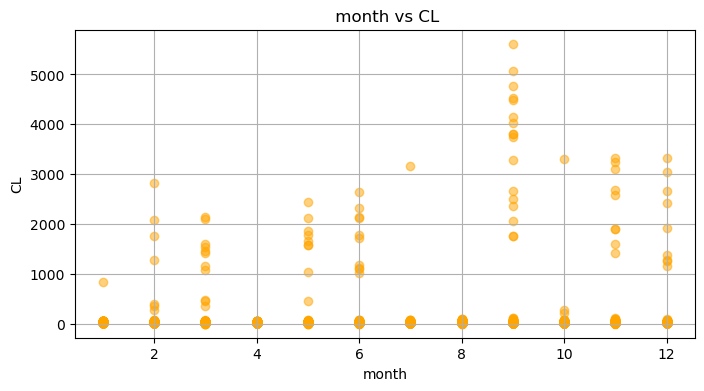

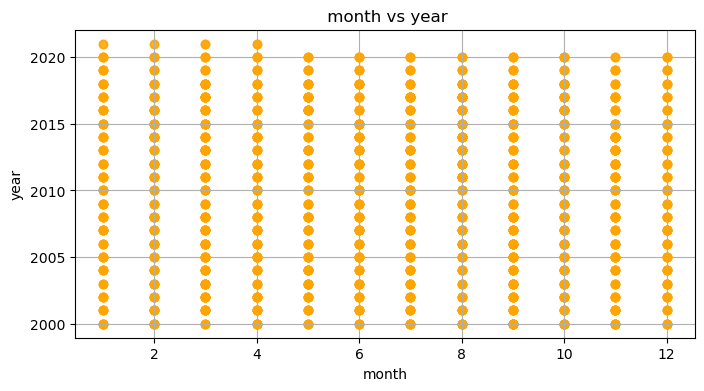

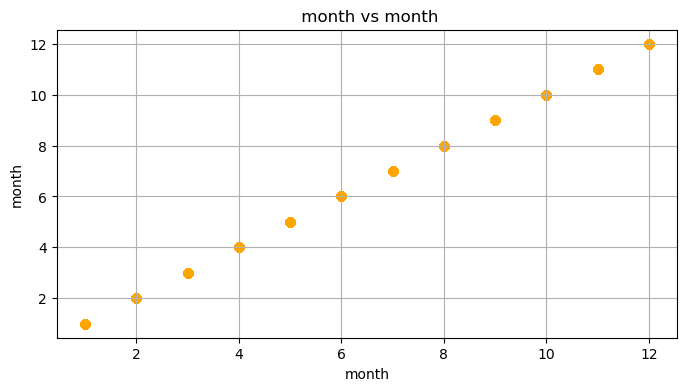

In [98]:
#Scatter plot
extra_pollutants=[i for i in Index if i not in pollutants]
for j in extra_pollutants:
    for i in Index:
        if i!=pollutants:
            plt.figure(figsize=(8,4))
            plt.scatter(df[j],df[i],color='orange',alpha=0.5)
            plt.title(f" {j} vs {i}")
            plt.xlabel(j)
            plt.ylabel(i)
            plt.grid(True)
            plt.show()

In [45]:
#Train model
model=MultiOutputRegressor(RandomForestRegressor(n_estimators=100,random_state=42))
model.fit(X_train,y_train) 

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

model.fit(X_train,X_test)
y_pred=model.predict(X_test)

In [47]:
y_pred=model.predict(X_test)

In [53]:
print("Model Performance on the Test Data: ")
for i,pollutant in enumerate(pollutants):
    print(f'{pollutant} :')
    print("MSE :",mean_squared_error(y_test.iloc[:,i],y_pred[:,i]))
    print("R2 :",r2_score(y_test.iloc[:,i],y_pred[:,i]))
    print()

Model Performance on the Test Data: 
O2 :
MSE : 22.21825046040189
R2 : -0.01674257045728833

NO3 :
MSE : 18.153106746365886
R2 : 0.5162032171220556

NO2 :
MSE : 10.607352172601502
R2 : -78.42066512350873

SO4 :
MSE : 2412.139350033052
R2 : 0.4118345603876148

PO4 :
MSE : 0.38496938017964155
R2 : 0.3221189891402043

CL :
MSE : 34882.81433245622
R2 : 0.7357918194149974



In [54]:
X_test.shape

(556, 22)

In [58]:
station_id='22'
year_input=2022
input_data=pd.DataFrame({'year' : [year_input],'id':[station_id]})
input_encoded=pd.get_dummies(input_data,columns=['id'])



In [60]:
#Alogn with training featire columns
missing_cols=set(X_encoded.columns)-set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col]=0
input_encoded=input_encoded[X_encoded.columns]

In [62]:
#predict Pollutants
pred_pollutant=model.predict(input_encoded)[0]
print(f"Predicted pollutants levels for station '{station_id}' in {year_input} :")
for p,val in zip(pollutants,pred_pollutant):
    print(f'{p} : {val:.2f}')

Predicted pollutants levels for station '22' in 2022 :
O2 : 12.60
NO3 : 6.90
NO2 : 0.13
SO4 : 143.08
PO4 : 0.50
CL : 67.33


In [63]:
import joblib
joblib.dump(model,'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(),"model_columns.pkl")
print("Model and Columns Structure are saved!")

Model and Columns Structure are saved!
